Packages importation

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score


In [74]:
path = "data/features_30_sec.csv"

music_data = pd.read_csv(path)
print("Dataset has", music_data.shape)
music_data.head()

Dataset has (1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


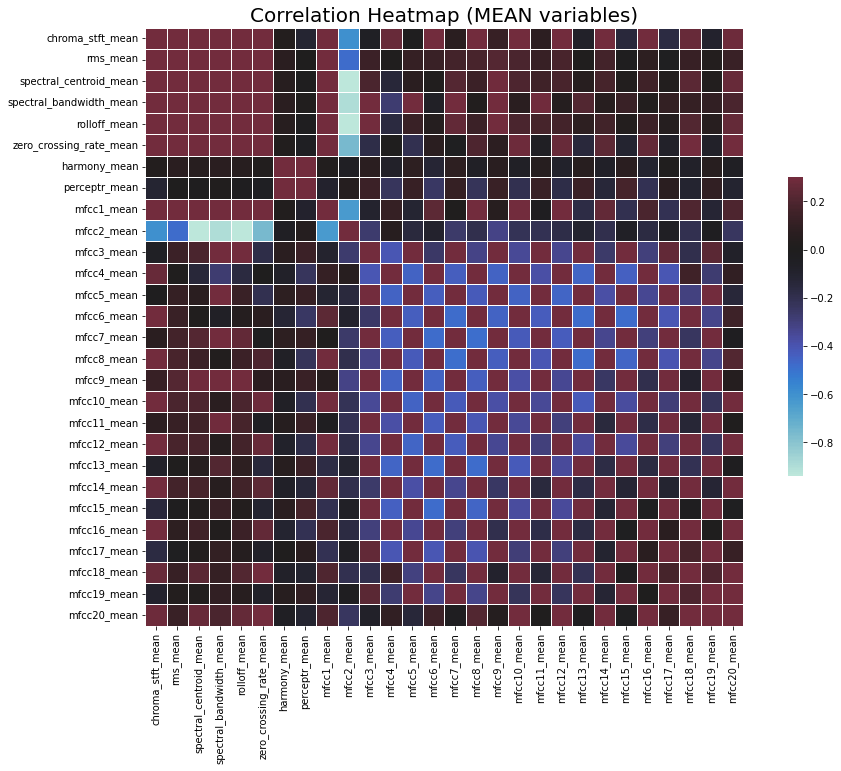

In [75]:
# Computing the  Correlation Matrix using only the features that have 'mean' in their name.
mean_cols = [col for col in music_data.columns if 'mean' in col]
corr = music_data[mean_cols].corr()

#the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));
sns.heatmap(corr, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

In the heat map, warm colors represent high values and cool values represent low values. Values in a correlation matrix range from -1 to 1. A value of one indicates a perfect positive correlation meaning as one value increases, the other also increases. A value of -1 indicates a perfect negative correlation meaning as one value increases, the other decreases. A value of 0 indicates no correlation between the variables.

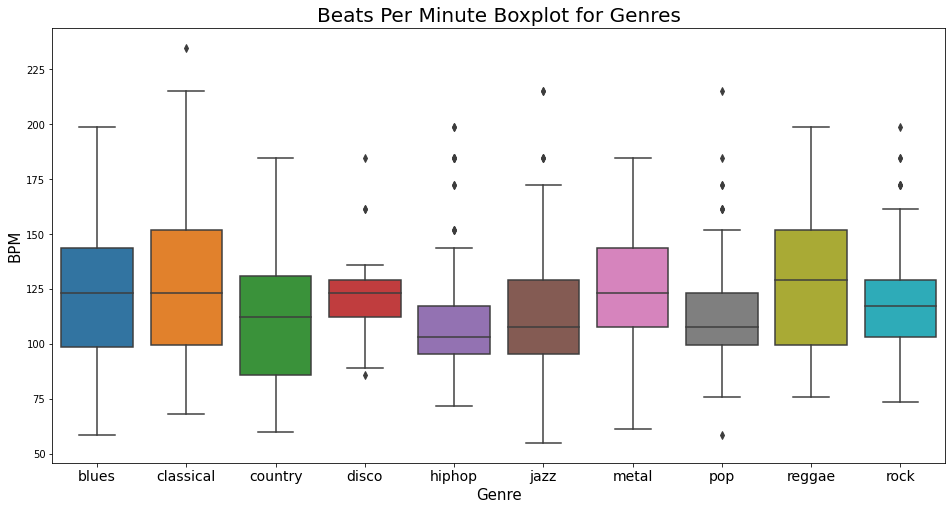

In [76]:
# A box plot to show the distribution of music pieces in different genres in different tempo/beats per minute values.
x = music_data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [77]:
#Checking for null values in the data. 
print("Columns with null values are",list(music_data.columns[music_data.isnull().any()]))
#Since there are no null values in any of the columns, there is no need to create dummy values.

Columns with null values are []


In [78]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(music_data.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [79]:
# update labels in df to index
music_data.label = [label_index[l] for l in music_data.label]

In [80]:
#Splitting the data into training testing and validation sets
data_shuffle = music_data.sample(frac=1, random_state=12).reset_index(drop=True) #shuffling the data
# remove columns that have no impact on the prediction
data_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
data_y = data_shuffle.pop('label')
data_X = data_shuffle


# split original dataset into train and test
X_train, data_test_valid_X, y_train, data_test_valid_y = skms.train_test_split(data_X, data_y, train_size=0.7, random_state=12, stratify=data_y)
#split test dataset into validation and test
X_validation, X_test, y_validation, y_test = skms.train_test_split(data_test_valid_X, data_test_valid_y, train_size=0.66, random_state=12, stratify=data_test_valid_y)
#stratify - all the sets will have an equal proportion of genres

#Validating the data splits
print(f"Train set has {X_train.shape[0]} records out of {len(data_shuffle)} which is {round(X_train.shape[0]/len(data_shuffle)*100)}% of the data.")
print(f"Validation set has {X_validation.shape[0]} records out of {len(data_shuffle)} which is {round(X_validation.shape[0]/len(data_shuffle)*100)}% of the data.")
print(f"Test set has {X_test.shape[0]} records out of {len(data_shuffle)} which is {round(X_test.shape[0]/len(data_shuffle)*100)}% of the data.")

Train set has 700 records out of 1000 which is 70% of the data.
Validation set has 198 records out of 1000 which is 20% of the data.
Test set has 102 records out of 1000 which is 10% of the data.


In [81]:
#scaling the features. This will ensure that features with larger values do not affect the prediction
#disproportionately compared to the smaller values
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [82]:
X_train[:5] # To show the changes in the values of the features.

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.057247,-0.790500,0.342682,-0.514693,0.083436,-0.592513,-0.178699,-0.835022,0.016406,-0.635393,...,0.768181,-0.544900,-1.372360,-1.048256,0.276826,-0.949620,-0.146467,-0.923327,0.130373,-0.942447
1,-0.734659,-0.209415,0.770486,0.124682,-0.327375,-0.484939,-0.391665,-0.521084,-0.323645,-0.518111,...,0.634784,0.175229,-1.305191,0.214344,0.602786,-0.276234,-1.546473,-0.229145,-1.060775,-0.662192
2,1.752669,-2.038986,-0.276637,-0.612828,0.665096,-0.729102,0.134450,-1.085243,0.471748,-0.917944,...,1.516314,-0.606788,-0.782357,-1.167385,1.330279,-0.895360,-0.525507,-0.933720,1.079782,-0.934836
3,-0.155343,0.714559,0.888791,0.447331,0.119819,-0.229398,0.649484,0.142947,0.417062,0.103119,...,0.606047,-0.005242,0.817352,-0.270879,-0.046698,0.271937,1.137747,0.360000,0.721559,-0.430315
4,-1.295979,0.759244,-0.484529,-0.460918,-1.353810,-0.505271,-1.472509,0.047439,-1.351078,-0.405064,...,-2.314510,-0.105180,-0.114584,-0.087874,-1.576440,1.304544,0.348574,2.445483,0.007638,1.687644


In the next cell, the results function has a model, data and a boolean as its parameters. It returns a confusion matrix and a classification report (accuracy, F1-score, precision and recall values) for the different genres. When validation is set to false, confusion matrix and the classification report for the training dataset and when validation is set to true, it uses the validation dataset to test the accuracy of the model.

In [83]:
def results(model, X, validation=False):
    y_true = y_train
    if validation:
        X = X_validation[X.columns]
        y_true = y_validation
    y_prediction = model.predict(X)
    confusion_matrix = skm.confusion_matrix(y_true, y_prediction)
    cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.show()
    print(skm.classification_report(y_true, y_prediction, digits=3))
    print(skm.precision_recall_fscore_support(y_true, y_prediction, average="macro"))
    print("=====================================================")

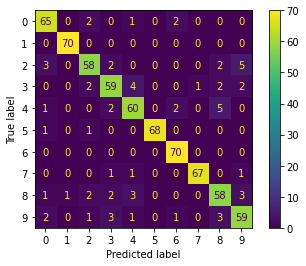

              precision    recall  f1-score   support

           0      0.890     0.929     0.909        70
           1      0.986     1.000     0.993        70
           2      0.879     0.829     0.853        70
           3      0.855     0.843     0.849        70
           4      0.857     0.857     0.857        70
           5      1.000     0.971     0.986        70
           6      0.933     1.000     0.966        70
           7      0.985     0.957     0.971        70
           8      0.829     0.829     0.829        70
           9      0.843     0.843     0.843        70

    accuracy                          0.906       700
   macro avg      0.906     0.906     0.905       700
weighted avg      0.906     0.906     0.905       700

(0.9057385673969673, 0.9057142857142859, 0.9054471159370465, None)


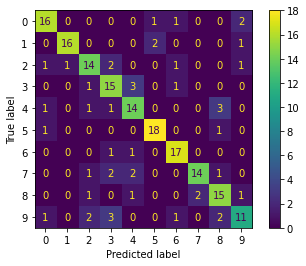

              precision    recall  f1-score   support

           0      0.800     0.800     0.800        20
           1      0.941     0.842     0.889        19
           2      0.700     0.700     0.700        20
           3      0.625     0.750     0.682        20
           4      0.667     0.700     0.683        20
           5      0.857     0.900     0.878        20
           6      0.810     0.895     0.850        19
           7      0.875     0.700     0.778        20
           8      0.682     0.750     0.714        20
           9      0.688     0.550     0.611        20

    accuracy                          0.758       198
   macro avg      0.764     0.759     0.758       198
weighted avg      0.763     0.758     0.757       198

(0.7643827985739751, 0.7586842105263158, 0.7584857283637773, None)


In [84]:
#Feature importance using logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)
results(lr, X_train)
results(lr, X_train, validation=True)

In [92]:
X_test
print(lr.predict(X_test))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- filename
- label
- length


In [85]:
# Modifying the results function to return a confusion matrix for the test set
def test_results(model, X, validation=False):
    y_true = y_train
    if validation:
        X = X_test[X.columns]
        y_true = y_test
    y_prediction = model.predict(X)
    confusion_matrix = skm.confusion_matrix(y_true, y_prediction)
    cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.show()
    print(skm.classification_report(y_true, y_prediction, digits=3))
    print(skm.precision_recall_fscore_support(y_true, y_prediction, average="macro"))
    print("=====================================================")

In [86]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = skm.accuracy_score(y_test, y_pred)
    prec = skm.precision_score(y_test, y_pred, average='weighted')
    rec = skm.recall_score(y_test, y_pred, average='weighted')
    f1 = skm.f1_score(y_test, y_pred, average='weighted')
    print("Accuracy: {:.3f}".format(acc))
    print("Precision: {:.3f}".format(prec))
    print("Recall: {:.3f}".format(rec))
    print("F1-score: {:.3f}".format(f1))
    return acc, prec, rec, f1

In [87]:
test_model(lr, X_test, y_test)

Accuracy: 0.706
Precision: 0.725
Recall: 0.706
F1-score: 0.709


(0.7058823529411765,
 0.7254901960784313,
 0.7058823529411765,
 0.7094136857294752)

######################################################################

    TRYING TO IMPROVE THE MODEL BY OPTIMISING HYPERPAREMETERS

######################################################################

In [88]:
# GridSearchCV (Not really effective)

from sklearn.model_selection import GridSearchCV

# Créer une grille de paramètres à tester
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Utiliser la validation croisée pour tester les différents paramètres
grid_search = GridSearchCV(LogisticRegression(max_iter=400), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir le meilleur modèle et ses paramètres
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Tester le modèle sur les données de test
test_model(best_model, X_test, y_test)

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Accuracy: 0.706
Precision: 0.719
Recall: 0.706
F1-score: 0.707


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by sett

(0.7058823529411765,
 0.7193406811053871,
 0.7058823529411765,
 0.7069890644249477)

In [89]:
# RandomForestClassifier (Not really effective)

from sklearn.ensemble import RandomForestClassifier

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Grid search object using the random forest classifier and the hyperparameters to tune
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best model
rfc = grid_search.best_estimator_

# Test the model
test_model(rfc, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.71
Accuracy: 0.667
Precision: 0.669
Recall: 0.667
F1-score: 0.663


(0.6666666666666666,
 0.6692315309962369,
 0.6666666666666666,
 0.6633780306380926)